In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')
    return HTML(styles.text)
css_styling()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams['animation.html'] = 'html5'

# Problem 1
## Derive the modified equation for an FTCS scheme for the linear advection equation:

$$u_t = -cu_x $$

The numerical form of a this partial differential equation actually solves an equation of the form:

$$u_t = a_1u_x + a_2u_{xx} + a_3u_{xxx} + a_4u_{xxxx} + ... $$

where odd-ordered derivatives represent advection and dispersion terms, and even-ordered derivatives represent diffusion terms.

Re-writing the PDE in numerical form following an FTCS scheme:

$$\frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} \  +\  c\frac{u^{n}_{i+1}-u^{n}_{i-1}}{\Delta x} =0$$

Expanding the $u^{n+1}_i$ term as a Taylor series about time $n$:

$$u^{n+1}_{i}=u^{n}_{i}+\frac{1}{2!}\frac{\partial u^{n}_{i}}{\partial t} \Delta t+\frac{1}{3!}\frac{\partial^{2} u^{n}_{i}}{\partial t^{2}} \Delta t+...$$

which can be written in shorthand as:

$$u^{n+1}_{i}=u^{n}_{i}+\Delta tu^{n}_{it}+\frac{\Delta t^{2}}{2} u^{n}_{itt}+\frac{\Delta t^{3}}{3!} u^{n}_{ittt}+...$$

A brief note about this notation: The first index in the subscript indicates the velocity at point $i$, and is not a derivative. Similarly, we can expand the $u^{n}_{i\pm 1}$ term about $i$:

$$u^{n}_{i\pm 1}=u_{i}\pm \Delta xu^{n}_{ix}+\frac{\Delta x^{2}}{2} u^{n}_{ixx}\pm \frac{\Delta x^{3}}{3!} u^{n}_{ixxx}+...$$

Making the substitution into the numerical equation and rearranging gives:

$$u^{n}_{it}+cu^{n}_{ix}=-\frac{\Delta t}{2} u_{itt}-\frac{\Delta t^{2}}{3!} u_{ittt}+\frac{\Delta x^{2}}{3!} u^{n}_{ixxx}+...$$

We have recovered the original equation on the left. On the right, the spatial derivatives of even order did not survive the operation, but the odd-ordered ones, which had opposite signs, did. 

We now want the time derivatives in terms of space. We can differentiate the original equation in terms of time to obtain:

$$u_{tt}+cu_{xt}=u_{tt}+cu_{tx}=u_{tt}+c(-cu_{x})_{x}=u_{tt}-c^{2}u_{xx}=0$$

and therefore:

$$u_{tt} = c^2u_{xx}$$

Similarly, differentiating twice WRT time:

$$u_{ttt}+cu_{xtt}=u_{ttt}+cu_{ttx}=u_{ttt}+c(c^{2}u_{xx})_{x}=u_{ttt}+c^{3}u_{xxx}=0$$

and therefore:

$$u_{ttt} = -c^3u_{xxx}$$

Substituting gives:

$$u^{n}_{it}+cu^{n}_{ix}=-\frac{\Delta tc^{2}}{2} u_{ixx}+\left(\frac{\Delta t^{2}c^{3}}{3!} +\frac{\Delta x^{2}}{3!} \right)u^{n}_{ixxx}+...$$

The first term on the right will always have a negative coefficient, since both $\Delta t$ and $c^2$ will always be positive. Therefore, negative diffusion will always exist and the scheme is unconditionally unstable.

## Conduct VonNeumann stability analysis for the FTCS scheme. Find the amplification factor and show that the scheme is unconditionally unstable.

Let the solution $u$ be 

$$u(x,t)\  =\  e^{qt}e^{ikx}$$

Therefore, the numerical advection equation is:

$$\frac{e^{q(t+\Delta t)}e^{ikx}-e^{qt}e^{ikx}}{\Delta t} +c\frac{e^{qt}e^{ik(x+\Delta x)}-e^{qt}e^{ik(x-\Delta x)}}{2\Delta x} =0$$



Dividing this equation by $e^{qt}e^{ikx}$ gives:

$$\frac{e^{q\Delta t}-1}{\Delta t} +c\frac{e^{ik\Delta x}-e^{-ik\Delta x}}{2\Delta x} =0$$

$$e^{q\Delta t}-1+\frac{c\Delta t}{2\Delta x} (e^{ik\Delta x}-e^{-ik\Delta x})=0$$

Using the identity:

$$e^{ik\Delta x}-e^{-ik\Delta x}=cos(k\Delta x)+isin(k\Delta x)-(cos(k\Delta x)-isin(k\Delta x))=2isin(k\Delta x)$$

we can rewrite the equation as:

$$e^{q\Delta t}-1+i\frac{c\Delta t}{\Delta x} sin(k\Delta x)=0$$

$$e^{q\Delta t}=1-i\frac{c\Delta t}{\Delta x}sin(k\Delta x) $$

The magnitude of the term on the right is:

$$\sqrt{1+\left( \frac{c\Delta t}{\Delta x} \right)^{2}  } $$

which is always greater than one, and therefore will contribute to positive growth, and instability.

Alternatively, the value of q can be found to be:


$$q\Delta t\  +\  ln\left( \frac{c\Delta t}{2\Delta x} \right)  +ln\left( \frac{e^{ik\Delta x}}{e^{-ik\Delta x}} \right)  =0 $$

$$q\Delta t\  +\  ln\left( \frac{c\Delta t}{2\Delta x} \right)  +2ik\Delta x=0$$

$$q\  =\  -\frac{1}{\Delta t} ln\left( \frac{c\Delta t}{2\Delta x} \right)  -i\frac{2k\Delta x}{\Delta t}  $$

The magnitude of which will is:

$$\sqrt{\left( \frac{1}{\Delta t} ln\left( \frac{c\Delta t}{2\Delta x} \right)  \right)^{2}  +\left( \frac{2k\Delta x}{\Delta t} \right)^{2}  } $$

This will also always be greater than 0, and so the exponential term will always grow.

## Use the amplification factor to derive the first two spatial derivative terms of the modified equation

In [3]:
from sympy import *
init_printing(use_unicode=True)

Recall that the numerical scheme can be written as a series of spatial derivatives:

$$u_t = a_1u_x + a_2u_{xx} + a_3u_{xxx} + a_4u_{xxxx} + ... $$

Again, if we let the solution be $u(x,t) = e^{qt}e^{ikx}$, then our equation becomes:

$$qu\  =\  \sum^{}_{} a_{n}i^{n}k^{n}u$$

and therefore:

$$q\  =\  \sum^{}_{n} a_{n}i^{n}k^{n}$$

where, in general:

$$a_{n}=\frac{1}{i^{n}n!} \frac{\partial^{n} q}{\partial k^{n}} \big |_{k=0}$$

In [7]:
dt, dx, k, c, x, t= symbols('dt, dx, k, c, x, t', real=True)

In [13]:
q = 1/dt*ln(1-c*dt/2/dx*(exp(I*k*dx)-exp(-I*k*dx)))

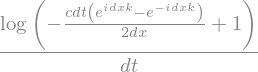

In [14]:
q

In [15]:
dqdx = q.diff(k)

In [16]:
dqdx.subs(k,0)

In [19]:
n = 1
a1 = 1/(I**n*factorial(n))*dqdx.subs(k,0)

In [20]:
a1

Here, we have exactly recovered the coefficient of the first spatial derivative. Moving on to the second derivative:

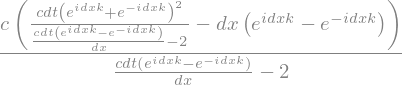

In [21]:
d2qdk = q.diff(k,2)
d2qdk

In [25]:
n = 2
a2 = 1/(I**n*factorial(n))*d2qdk.subs(k,0)

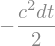

In [26]:
a2

We have also successfuly recovered the coefficient of the second spatial derivative.

# Problem 2
## The diffusion term in the previous problem causes instability. Propose a modification to the FTCS scheme to suppress the term.

One solution would be to solve a modified version of the equation where we add the unstable diffusion term, thereby canceling it out of the modified equation. The proposed equation is therefore: